# Introduction to OpenCV DNN Module

We will learn about the DNN module in OpenCV:
1. Learn about a sample of popular pre-trained models
2. Learn avout different supported frameworks
3. Load and use an image classification model
4. Testing the model with more examples

## 1 Different Models that OpenCV DNN Module Supports

| Image Classification | Object Detection | Image Segmentation | Text detection and recognition | Human Pose estimation | Person and face detection |
|:--------------------:|:----------------:|:------------------:|:------------------------------:|:---------------------:|:-------------------------:|
|        Alexnet       |   MobileNet SSD  |       DeepLab      |            Easy OCR            |       Open Pose       |         Open Face         |
|       GoogLeNet      |      VGG SSD     |        UNet        |              CRNN              |       Alpha Pose      |         Torchreid         |
|          VGG         |   Faster R-CNN   |         FCN        |                                |                       |       Mobile FaceNet      |
|          DenseNet    |   EfficientDet   | OpenCV FaceDetector|                                |                       |                           |                         |

## 2 Frameworks Supported by OpenCV DNN Module

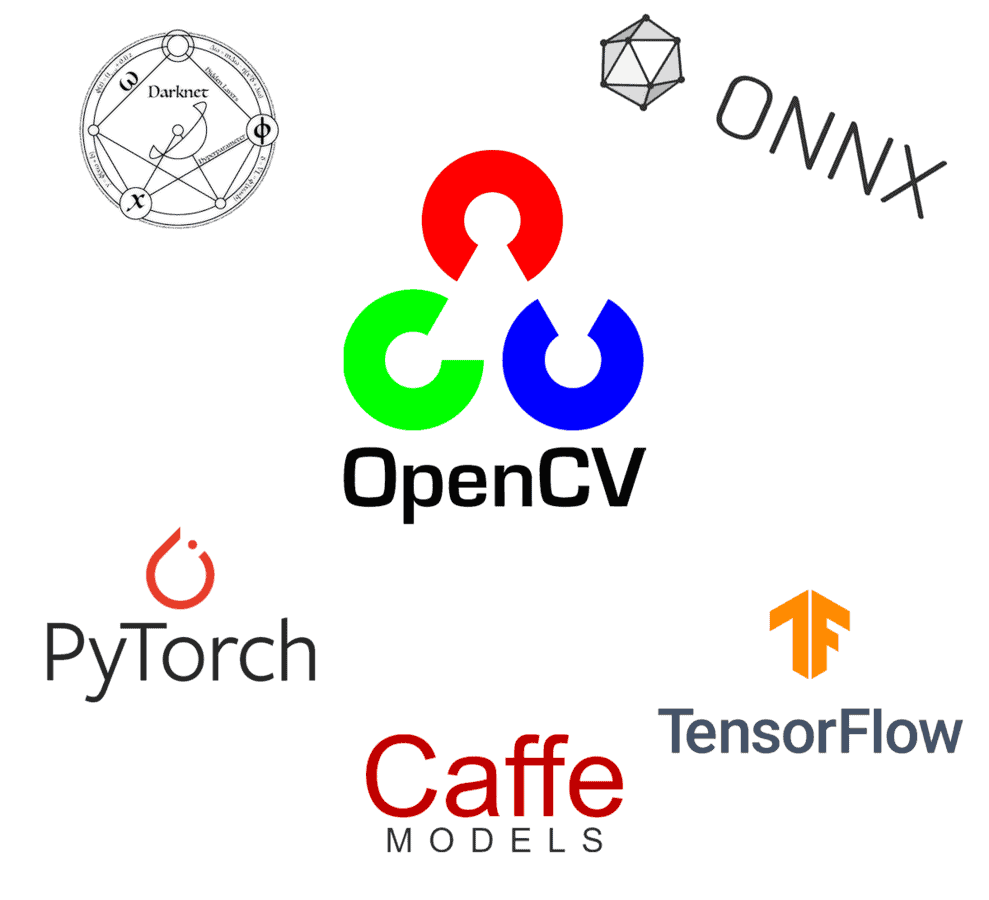

## 3. Image Classification using OpenCV DNN 

Let us now see one of the most common computer vision problems using the dnn module of OpenCV. We will use the **DenseNet121** deep neural network model for classifying images into 1000 classes of the famous [*ImageNet*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjasLG-yKbyAhW3IbcAHRW1BZkQFnoECAwQAw&url=https%3A%2F%2Fwww.image-net.org%2F&usg=AOvVaw07SoUbpxRQk8ZNEiJoLqt5) dataset.

We will follow the following steps to classify an image:

1. Load the class names from .txt file and extract the labels. This has a list of all objects that can be identified by the model.
2. Load the pre-trained neural network model from disk using the `readNet` function.
3. Load the image from disk to pass through model
4. Prepare the input image by converting it to a blob using the `blobFromImage` function.
5. Set the blob as an input to the network using `setInput`
6. Use `forward` to pass the blob through the model to get the outputs.

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

### 3.1 Read Class File

This will read the class file associated with the Imagenet dataset. It has 1000 objects and their class IDs. We will use this information to decode the predictions obtained from the network.

In [2]:
# Read the ImageNet class names.
with open('../input/classification_classes_ILSVRC2012.txt', 'r') as f:
    image_net_names = f.read().split('\n')

# Save the names of all possible classifications, removing empty final line.
class_names = image_net_names[:-1]

# Verify the size, and inspect one of the classes by name.
print(len(class_names), class_names[0])

1000 tench, Tinca tinca


### 3.2 Load Model

Loads the model using the readNet function. We will use a caffe model for this example.

In [3]:
# Loading the Classification model.
config_file = '../models/DenseNet_121.prototxt'
model_file = '../models/DenseNet_121.caffemodel'

model = cv2.dnn.readNet(model=model_file, config=config_file, framework='Caffe')

### 3.3 Read Image

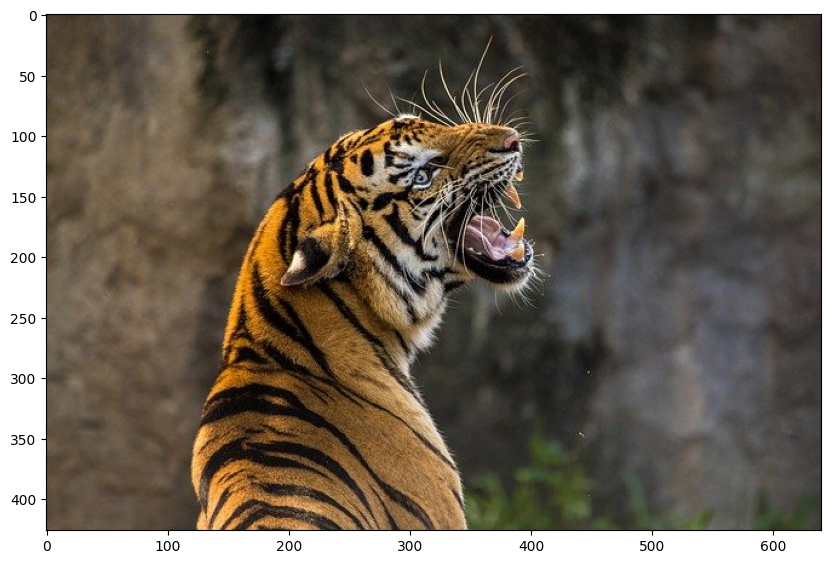

In [4]:
# Load and display the image from disk.
tiger_img = cv2.imread('../input/image1.jpg')
plt.figure(figsize=[10, 10])
plt.imshow(tiger_img[:, :, ::-1]);

### 3.4 Converting Image to Blob

In this context, blob is a technical term for the transformed representation of an image that we were able to pass through a deep neural network.

Because images come in so many different format, sizes, resolutions number of color channels even, we need to standardize them.

When someone creates a model they often performs specific pre-processing steps on the entire training dataset typically to normalize image in some way or another.

The neural network was trained using images that were pre-processed in a specific way and therefore when we want to use the same neural network for inference we have to pre-process our images in the same way that the training data was pre-processed.

In terms of blob format itself, this is an image representation that is alway four dimensional where the first dimension is the number of images, number of chanels and then the width and height of the image to be used.

In [5]:
# Create a blob from image.
blob = cv2.dnn.blobFromImage(
    image=tiger_img,
    scalefactor=0.017,
    size=(224, 224),
    mean=(104, 117, 123),
    swapRB=False,
    crop=False,
)

In [6]:
# Set the input blob for the neural network.
model.setInput(blob)

In [7]:
# Pass the blob forward through the network.
outputs = model.forward()
final_outputs = outputs[0]

In [8]:
# Make all the outputs 1D, where each represents likihood of matching one of the 1K classification groups.
final_outputs = final_outputs.reshape(1000, 1)

# Get the class label index with the max confidence.
label_id = np.argmax(final_outputs)

# Convert score to probabilities for all matches.
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))

print(probs[:10])
print("Max probability:", np.max(probs))

[[2.1499585e-10]
 [4.0102194e-10]
 [4.2768619e-10]
 [3.2427300e-10]
 [1.6526440e-11]
 [1.6457802e-11]
 [1.5199699e-11]
 [4.4728008e-09]
 [5.0410902e-09]
 [1.1915434e-09]]
Max probability: 0.9372195


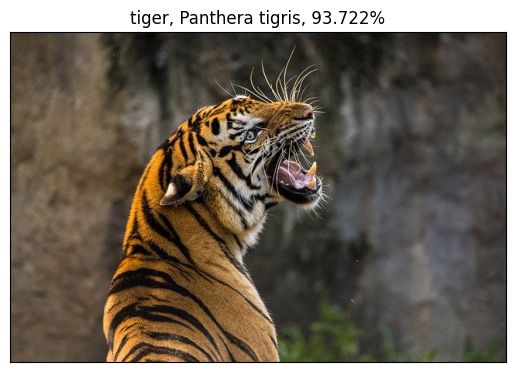

In [9]:
# Get the final highest probability
final_prob = np.max(probs) * 100.0

# Map the max confidence to the class label names.
out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.3f}%"

# Display the image, best matched classification, and confidence.
plt.imshow(tiger_img[:, :, ::-1])
plt.title(out_text)
plt.xticks([]), plt.yticks([])
plt.show() 